# Temporal Difference Model

### Imports

In [14]:
import numpy as np
from matplotlib import pyplot as plt

import model
import graphs

#%matplotlib notebook

### Parameters

In [2]:
T = 5
N = 23   # time steps occurrence
γ = 0.98 # discount factor

### Figure 4

<IPython.core.display.Javascript object>


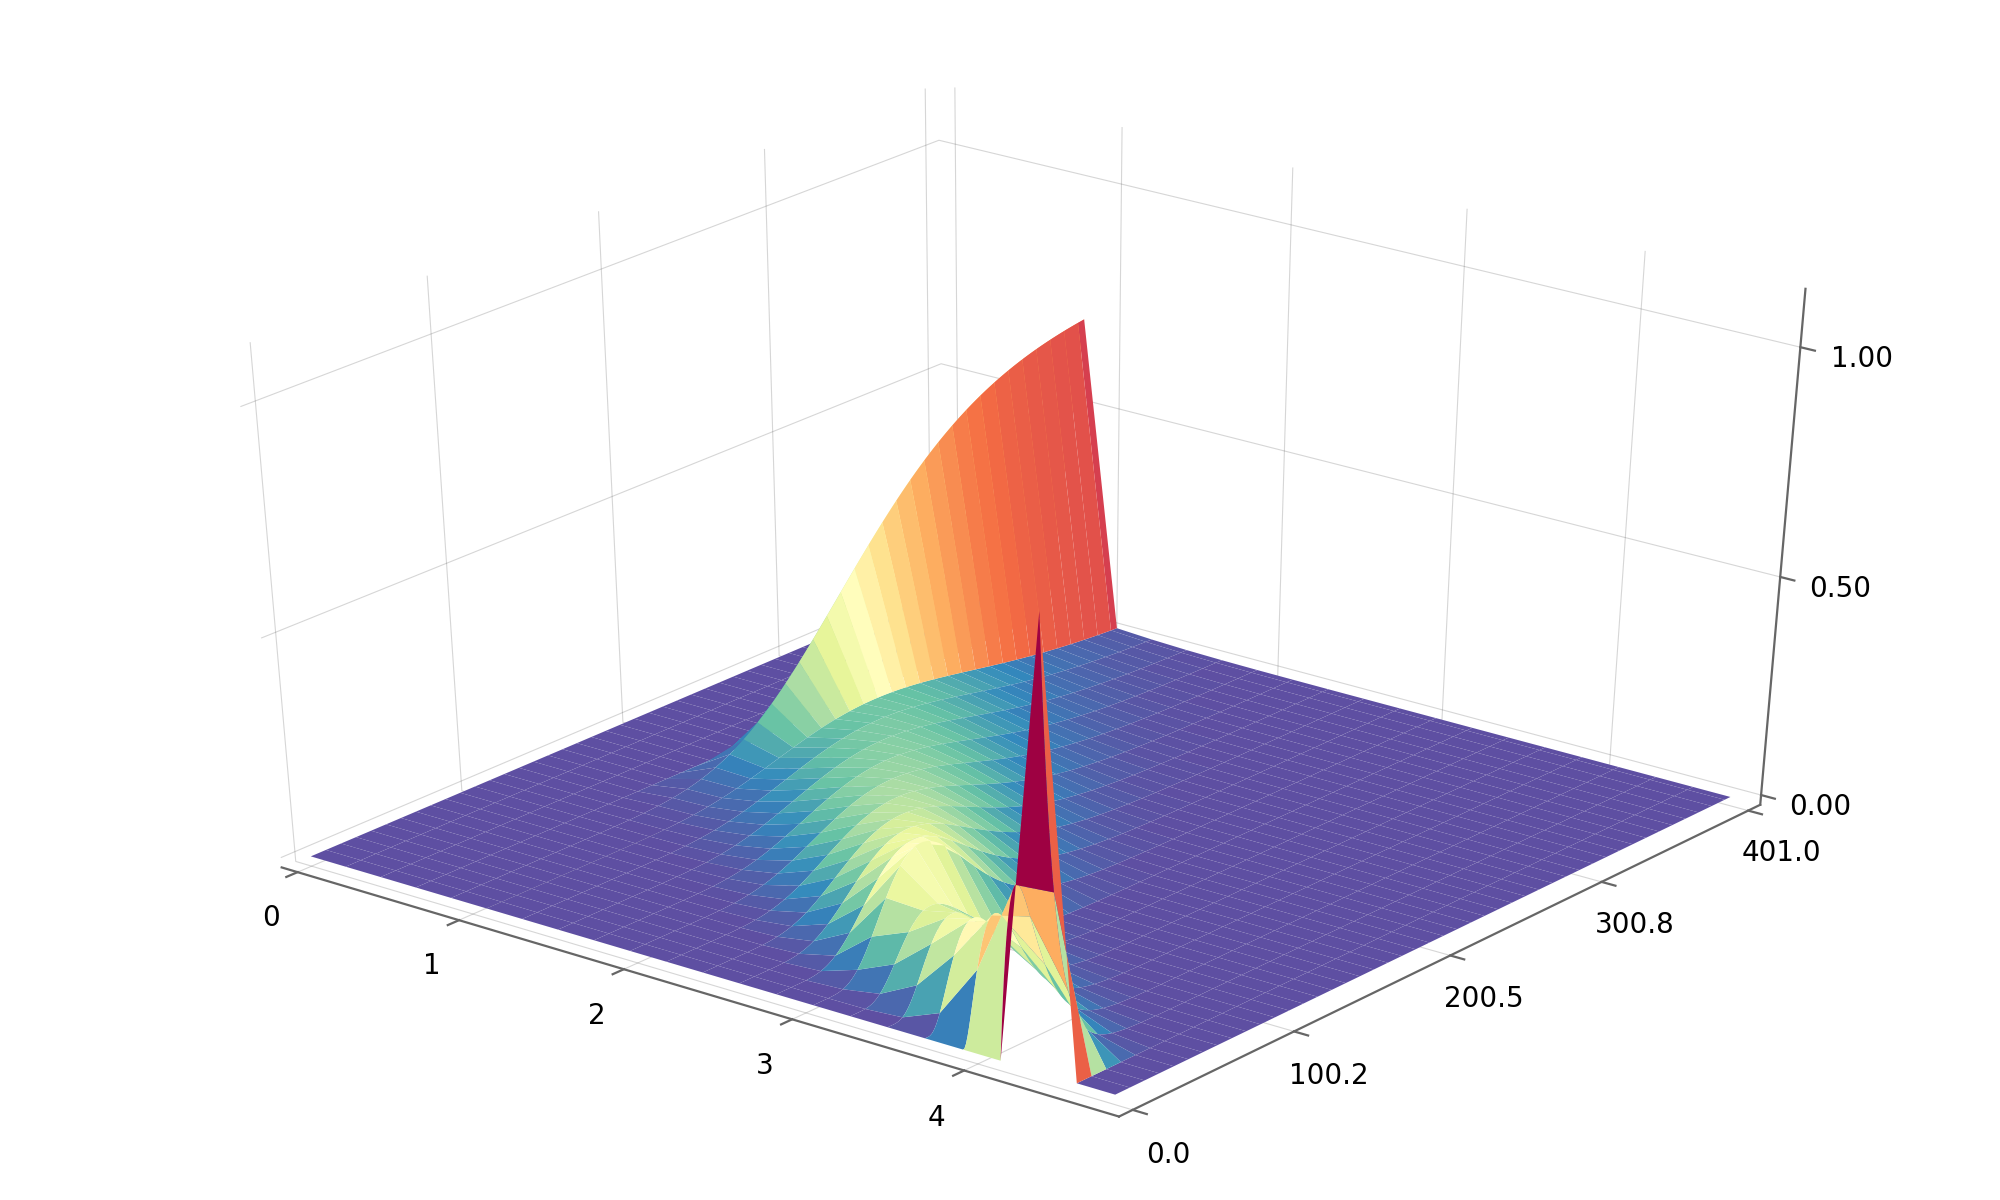

In [15]:
td_0 = model.TDModel(λ=0.0, α=0.05, γ=γ, N=N, T=T)
for _ in range(401):
    td_0.trial()
graphs.δ_3d(td_0, filename='Figure4B_3d')

In [4]:
graphs.δ_2d(td_0, 320, filename='Figure4B_late')

In [5]:
graphs.δ_2d(td_0, 80, filename='Figure4B_early')

In [6]:
graphs.δ_2d(td_0, 0, filename='Figure4B_random')

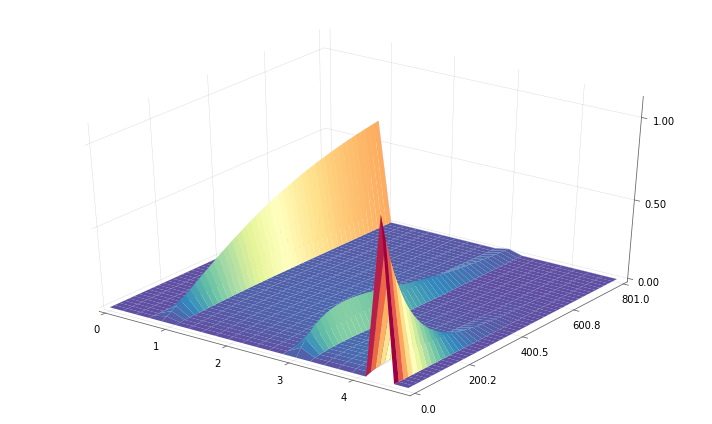

In [7]:
td_λ = model.TDModel(λ=0.9, α=0.005, γ=γ, N=N, T=T)
for _ in range(801):
    td_λ.trial()
graphs.δ_3d(td_λ, filename='Figure4C_3d')

In [8]:
graphs.δ_2d(td_λ, 400, filename='Figure4C_late')

In [9]:
graphs.δ_2d(td_λ, 100, filename='Figure4C_early')

In [10]:
graphs.δ_2d(td_λ, 0, filename='Figure4C_random')

### Figure 5

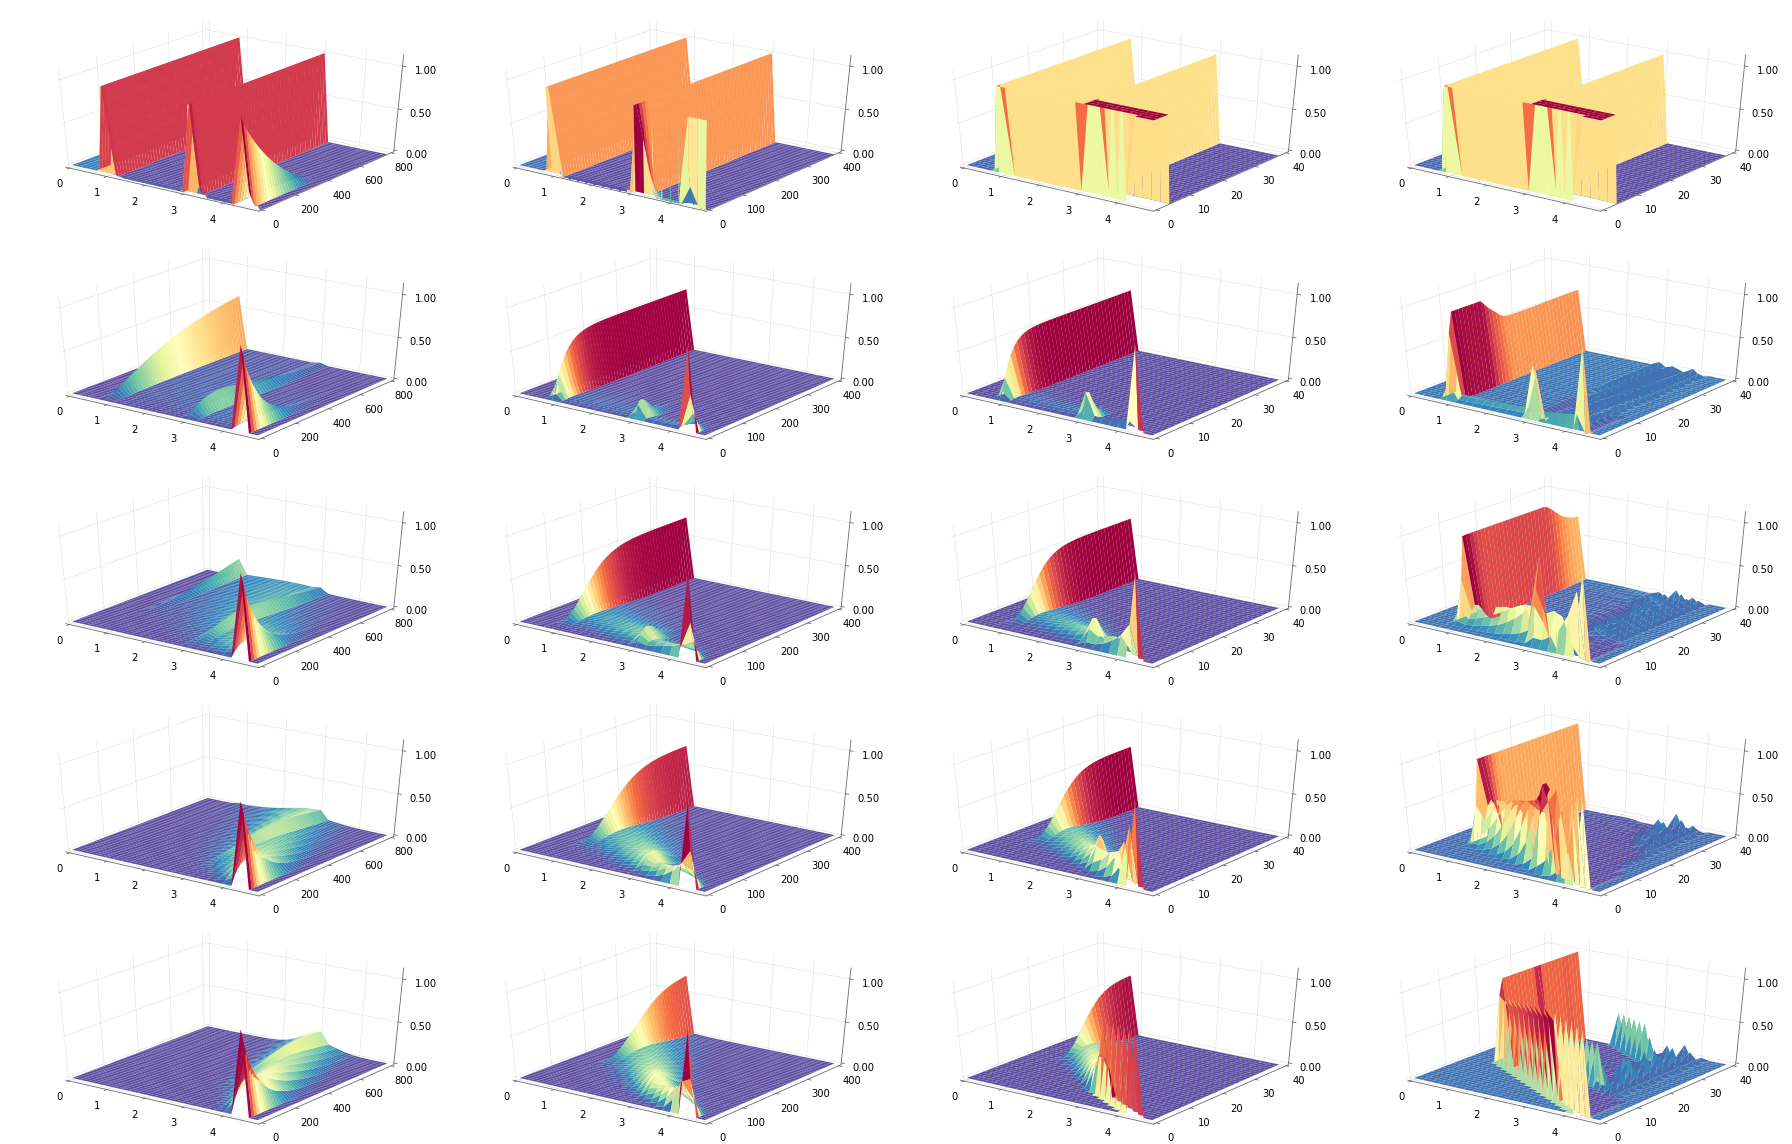

In [11]:
λs = [1.0, 0.9, 0.6, 0.3, 0.0]
αs = [0.005, 0.05, 0.5, 1]
n_trials_map = {0.005:800, 0.05:400, 0.5:40, 1:40}

fig = plt.figure(figsize=(25, 16))

counter = 0
for λ in λs:
    for α in αs:
        counter += 1
        tdmodel = model.TDModel(λ=λ, α=α, γ=γ, N=N, T=T)
        for t in range(n_trials_map[α]):
            tdmodel.trial()
        ax = plt.subplot(len(λs), len(αs), counter, projection='3d')
        graphs.δ_3d(tdmodel, ax=ax, show=False)
        
plt.tight_layout()
plt.savefig('figures/Figure5.pdf')
plt.show()

### Figure 6

In [12]:
td_λ = model.TDModel(λ=0.9, α=0.005, γ=γ, N=N, T=T)
for t in range(1, 402):
    if t in (101, 401):           # for 101th and 401th trial,
        td_λ.trial([True, False]) # ommit second stimuli
    else:
        td_λ.trial()
          
graphs.δ_2d_dashed(td_λ, 100, legend='Cued reward', dashed_t=101, dashed_legend='Omit cue 2', 
                   filename='Figure6A_early')

In [13]:
graphs.δ_2d_dashed(td_λ, 400, dashed_t=401, filename='Figure6A_late')